In [5]:
%run IDM_helper_functions.ipynb

In [6]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [37]:
import pandas as pd
import os
import pyreadr
import seaborn as sns
import scipy

In [18]:
data_dir = "/Users/wangjiashun/Desktop/Evans2021/Evans2017/dataBySubject/sub"
sample_size = 47

In [26]:
path = os.path.join(data_dir+str(i+1)+".csv")
df = pd.read_csv(path, sep = ",")
df = df[df["Cond"]=="Accuracy"] 

In [27]:
df

,Time,Correct,Stim,Cond
0,3.001,False,Stim1,Accuracy
1,0.878,False,Stim2,Accuracy
2,0.760,True,Stim1,Accuracy
3,0.727,True,Stim1,Accuracy
4,0.647,True,Stim1,Accuracy
...,...,...,...,...
305,1.032,True,Stim2,Accuracy
306,0.888,True,Stim1,Accuracy
307,0.681,True,Stim1,Accuracy
308,1.112,True,Stim2,Accuracy


In [30]:
par_fitted_A = np.zeros((sample_size,4))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Speed"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_A[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_A[i,:])


0


Info: Params [0.67140661 5.30625009 1.00127303 0.27915626] gave 81.43281356227956


[0.67140661 1.00127303 0.27915626 5.30625009]
1


Info: Params [2.60456625 6.71763525 2.3579153  0.32234729] gave -250.5345712111668


[2.60456625 2.3579153  0.32234729 6.71763525]
2


Info: Params [1.13769424 4.72371407 1.29078348 0.17219597] gave 60.99709001910311


[1.13769424 1.29078348 0.17219597 4.72371407]
3


Info: Params [1.61028395 2.6340241  1.52880554 0.30836193] gave 134.8616782617632


[1.61028395 1.52880554 0.30836193 2.6340241 ]
4


Info: Params [1.64054706 5.6238889  1.49660023 0.27995659] gave -89.81027855652735


[1.64054706 1.49660023 0.27995659 5.6238889 ]
5


Info: Params [1.40032392 4.84495663 1.00631548 0.38243269] gave 60.11120966491045


[1.40032392 1.00631548 0.38243269 4.84495663]
6


Info: Params [0.4616042  5.61106585 1.42131068 0.10074735] gave 98.10158317610349


[0.4616042  1.42131068 0.10074735 5.61106585]
7


Info: Params [1.78872081 5.25694452 1.07804926 0.37494453] gave -102.47509903372678


[1.78872081 1.07804926 0.37494453 5.25694452]
8


Info: Params [1.92610731 4.02862048 1.65155599 0.36540147] gave -13.27129262951825


[1.92610731 1.65155599 0.36540147 4.02862048]
9


Info: Params [0.72476476 0.99641498 0.7549172  0.35423782] gave 271.71105023307115


[0.72476476 0.7549172  0.35423782 0.99641498]
10


Info: Params [0.96536592 3.0579955  0.85786824 0.38837119] gave 152.145408231584


[0.96536592 0.85786824 0.38837119 3.0579955 ]
11


Info: Params [0.72747231 4.68570791 1.92379136 0.10386922] gave 143.16281483505676


[0.72747231 1.92379136 0.10386922 4.68570791]
12


Info: Params [1.39158173 2.67179286 1.38234509 0.32353635] gave 108.96397072513679


[1.39158173 1.38234509 0.32353635 2.67179286]
13


Info: Params [0.53982264 2.43197437 1.27893244 0.31002185] gave 388.7129228379313


[0.53982264 1.27893244 0.31002185 2.43197437]
14


Info: Params [0.58919412 3.57814725 1.73544083 0.10098159] gave 196.21035537460656


[0.58919412 1.73544083 0.10098159 3.57814725]
15


Info: Params [1.54746664 3.8646807  1.36221694 0.32053951] gave 67.1256445019137


[1.54746664 1.36221694 0.32053951 3.8646807 ]
16


Info: Params [1.66455763 3.02403085 1.36046271 0.30417621] gave 99.8898670837219


[1.66455763 1.36046271 0.30417621 3.02403085]
17


Info: Params [1.30808856 5.38517763 1.24553383 0.31544972] gave 27.47824986602751


[1.30808856 1.24553383 0.31544972 5.38517763]
18


Info: Params [1.06904191 3.37936267 1.07590385 0.30675912] gave 160.8300046211562


[1.06904191 1.07590385 0.30675912 3.37936267]
19


Info: Params [0.48261914 1.2391558  1.56088062 0.10047897] gave 574.5815676615287


[0.48261914 1.56088062 0.10047897 1.2391558 ]
20


Info: Params [2.14675561 5.06265639 0.83478106 0.30695975] gave -204.59557738137815


[2.14675561 0.83478106 0.30695975 5.06265639]
21


Info: Params [1.83977926 3.88688167 1.56524716 0.27554012] gave -28.788861360781212


[1.83977926 1.56524716 0.27554012 3.88688167]
22


Info: Params [1.06686235 3.24809623 1.27495755 0.2932568 ] gave 201.95150106474705


[1.06686235 1.27495755 0.2932568  3.24809623]
23


Info: Params [1.18131787 3.44852745 2.31882577 0.31212902] gave 201.95481741068028


[1.18131787 2.31882577 0.31212902 3.44852745]
24


Info: Params [0.91028533 2.91940201 2.33411445 0.15129184] gave 288.2343540383441


[0.91028533 2.33411445 0.15129184 2.91940201]
25


Info: Params [2.12772104 6.07311463 1.67205409 0.41121339] gave -166.28203291243193


[2.12772104 1.67205409 0.41121339 6.07311463]
26


Info: Params [ 0.8357349  12.09572555  2.21776404  0.25691494] gave -179.08325363664864


[ 0.8357349   2.21776404  0.25691494 12.09572555]
27


Info: Params [1.64684137 5.88399857 0.89140046 0.41818152] gave -120.98967329944662


[1.64684137 0.89140046 0.41818152 5.88399857]
28


Info: Params [1.4001154  7.50729055 1.25283471 0.27641467] gave -129.44661615605912


[1.4001154  1.25283471 0.27641467 7.50729055]
29


Info: Params [0.78507361 2.36586283 1.44001796 0.39012851] gave 341.5782734304238


[0.78507361 1.44001796 0.39012851 2.36586283]
30


Info: Params [1.17308106 3.98798404 0.99520752 0.26045668] gave 68.29380425759159


[1.17308106 0.99520752 0.26045668 3.98798404]
31


Info: Params [1.43840707 2.18137356 1.52442685 0.28137941] gave 204.88223170261597


[1.43840707 1.52442685 0.28137941 2.18137356]
32


Info: Params [1.63450638 3.64119944 1.00729436 0.31958835] gave 5.211380393280535


[1.63450638 1.00729436 0.31958835 3.64119944]
33


Info: Params [0.31439717 7.26178578 2.24905241 0.1003146 ] gave 15.307597962727602


[0.31439717 2.24905241 0.1003146  7.26178578]
34


Info: Params [ 1.10330351 10.98996254  1.67789269  0.24124827] gave -183.19789040980297


[ 1.10330351  1.67789269  0.24124827 10.98996254]
35


Info: Params [ 1.34348293 13.00405849  3.3645098   0.30709045] gave -267.9374250384776


[ 1.34348293  3.3645098   0.30709045 13.00405849]
36


Info: Params [1.09977844 3.25524115 1.68282079 0.18490566] gave 208.2905272818266


[1.09977844 1.68282079 0.18490566 3.25524115]
37


Info: Params [1.39082023 8.92107332 1.16205216 0.25864695] gave -183.65640196129678


[1.39082023 1.16205216 0.25864695 8.92107332]
38


Info: Params [1.68350255 7.04365064 1.31215299 0.25741257] gave -163.19373938609547


[1.68350255 1.31215299 0.25741257 7.04365064]
39


Info: Params [0.79454169 4.99534182 1.76491171 0.24501745] gave 114.8455365539262


[0.79454169 1.76491171 0.24501745 4.99534182]
40


Info: Params [2.15025439 4.67623673 1.76771505 0.25104355] gave -139.1372656002154


[2.15025439 1.76771505 0.25104355 4.67623673]
41


Info: Params [1.42406815 5.30066022 0.95353699 0.30429258] gave -66.78897176527119


[1.42406815 0.95353699 0.30429258 5.30066022]
42


Info: Params [1.15702582 4.71906093 1.66325254 0.2636746 ] gave 65.29572906213265


[1.15702582 1.66325254 0.2636746  4.71906093]
43


Info: Params [0.65426529 3.78846538 1.74080893 0.1989632 ] gave 239.30200412573257


[0.65426529 1.74080893 0.1989632  3.78846538]
44


Info: Params [2.03461986 2.84766287 0.86640679 0.34962833] gave -88.62301880639004


[2.03461986 0.86640679 0.34962833 2.84766287]
45


Info: Params [1.15878512 3.52512863 1.15978655 0.31558591] gave 115.27445063025644


[1.15878512 1.15978655 0.31558591 3.52512863]
46


Info: Params [1.61262998 3.71345315 1.38292779 0.2333962 ] gave 17.060271384944503


[1.61262998 1.38292779 0.2333962  3.71345315]


In [32]:
par_fitted_B = np.zeros((sample_size,4))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Accuracy"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_B[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_B[i,:])


0


Info: Params [ 0.94461048 -1.58437244  0.75509537  0.40015888] gave 387.02600205381265


[ 0.94461048  0.75509537  0.40015888 -1.58437244]
1


Info: Params [ 1.5053064  -6.58378674  0.64131479  0.55226709] gave 337.34967093454236


[ 1.5053064   0.64131479  0.55226709 -6.58378674]
2


Info: Params [1.38722025 2.38756706 1.4880487  0.22684818] gave 111.00820608685021


[1.38722025 1.4880487  0.22684818 2.38756706]
3


Info: Params [1.32011253 0.48345224 8.50474665 0.10143469] gave 336.4317643189516


[1.32011253 8.50474665 0.10143469 0.48345224]
4


Info: Params [1.0874578  2.28718171 1.544275   0.28705869] gave 309.71235991898317


[1.0874578  1.544275   0.28705869 2.28718171]
5


Info: Params [1.08416925 1.79640018 1.53433637 0.37349781] gave 360.72467098543956


[1.08416925 1.53433637 0.37349781 1.79640018]
6


Info: Params [1.03100474 3.15979148 1.23626838 0.30014042] gave 235.30675502053958


[1.03100474 1.23626838 0.30014042 3.15979148]
7


Info: Params [1.95378513 2.71706289 1.73158103 0.40327683] gave -0.2785921193532346


[1.95378513 1.73158103 0.40327683 2.71706289]
8


Info: Params [1.64607254 1.86637479 3.45743467 0.10938291] gave 137.22639088088505


[1.64607254 3.45743467 0.10938291 1.86637479]
9


Info: Params [0.49503625 1.85986755 1.58513853 0.24274366] gave 482.7644288861388


[0.49503625 1.58513853 0.24274366 1.85986755]
10


Info: Params [0.38460915 0.75530341 1.40816012 0.36657482] gave 666.5213358212715


[0.38460915 1.40816012 0.36657482 0.75530341]
11


Info: Params [  1.13733554 -12.00348437   0.50060606   0.53172839] gave 465.8839046143304


[  1.13733554   0.50060606   0.53172839 -12.00348437]
12


Info: Params [ 0.82763011 -1.60257739  0.89397055  0.49548274] gave 499.7272891100235


[ 0.82763011  0.89397055  0.49548274 -1.60257739]
13


Info: Params [0.62406128 0.94001441 1.22115236 0.39853205] gave 518.697262689292


[0.62406128 1.22115236 0.39853205 0.94001441]
14


Info: Params [0.50195533 1.18047098 1.53873501 0.19684703] gave 577.0653780196303


[0.50195533 1.53873501 0.19684703 1.18047098]
15


Info: Params [0.97914581 1.0150324  1.64532808 0.34908799] gave 450.9397317287641


[0.97914581 1.64532808 0.34908799 1.0150324 ]
16


Info: Params [ 1.1801883  -7.62474161  0.60138751  0.44793811] gave 468.73679061095316


[ 1.1801883   0.60138751  0.44793811 -7.62474161]
17


Info: Params [0.62879146 1.34042412 1.11864345 0.37108043] gave 442.3222079448926


[0.62879146 1.11864345 0.37108043 1.34042412]
18


Info: Params [0.91871445 2.12231082 1.84055752 0.19188682] gave 401.4138223327686


[0.91871445 1.84055752 0.19188682 2.12231082]
19


Info: Params [0.44656836 0.82002104 1.98374131 0.10228333] gave 639.502592509334


[0.44656836 1.98374131 0.10228333 0.82002104]
20


Info: Params [1.22270719 0.59338158 1.00214611 0.38650498] gave 280.4043821650695


[1.22270719 1.00214611 0.38650498 0.59338158]
21


Info: Params [1.22448828 1.51845051 1.57560548 0.36051335] gave 316.72125150222746


[1.22448828 1.57560548 0.36051335 1.51845051]
22


Info: Params [0.73404792 1.25041313 1.36544197 0.37187502] gave 488.716814157827


[0.73404792 1.36544197 0.37187502 1.25041313]
23


Info: Params [0.63337749 1.06675801 2.33616865 0.30598783] gave 536.7277860080759


[0.63337749 2.33616865 0.30598783 1.06675801]
24


Info: Params [1.23395557 1.88451366 1.57724045 0.36513716] gave 318.00535471698214


[1.23395557 1.57724045 0.36513716 1.88451366]
25


Info: Params [1.19338294 1.49672927 1.66164055 0.41647592] gave 349.6929578723813


[1.19338294 1.66164055 0.41647592 1.49672927]
26


Info: Params [1.0514299  1.96915248 2.02674715 0.44821117] gave 379.6190578742455


[1.0514299  2.02674715 0.44821117 1.96915248]
27


Info: Params [1.40259419 2.22236414 1.43583723 0.4358687 ] gave 252.3360471829729


[1.40259419 1.43583723 0.4358687  2.22236414]
28


Info: Params [1.89029566 2.64923429 1.77760181 0.34068001] gave -12.647842798888234


[1.89029566 1.77760181 0.34068001 2.64923429]
29


Info: Params [0.6734685  1.33107161 2.96841295 0.29473564] gave 585.8153190348366


[0.6734685  2.96841295 0.29473564 1.33107161]
30


Info: Params [1.36452573 2.69805409 1.05993085 0.36986786] gave 139.301812539004


[1.36452573 1.05993085 0.36986786 2.69805409]
31


Info: Params [1.40257182 1.35427416 1.78988851 0.26086555] gave 315.954625662081


[1.40257182 1.78988851 0.26086555 1.35427416]
32


Info: Params [1.50684101 2.01793065 1.87942964 0.33185455] gave 215.70035743735048


[1.50684101 1.87942964 0.33185455 2.01793065]
33


Info: Params [ 1.80143976 -7.7995458   0.55969361  0.57245384] gave 207.89422859506507


[ 1.80143976  0.55969361  0.57245384 -7.7995458 ]
34


Info: Params [1.74227801 3.44265719 1.19684149 0.30182032] gave 42.77765371591548


[1.74227801 1.19684149 0.30182032 3.44265719]
35


Info: Params [1.11047898 2.39303037 1.3906039  0.42241457] gave 291.32651979954824


[1.11047898 1.3906039  0.42241457 2.39303037]
36


Info: Params [1.29171573 1.44897047 1.61287422 0.26432693] gave 312.99091243517995


[1.29171573 1.61287422 0.26432693 1.44897047]
37


Info: Params [1.79540345 3.75837583 2.00770175 0.29860013] gave 14.094142867665699


[1.79540345 2.00770175 0.29860013 3.75837583]
38


Info: Params [1.79357568 2.59517893 1.30602817 0.40740577] gave 59.248266216467194


[1.79357568 1.30602817 0.40740577 2.59517893]
39


Info: Params [0.68776618 0.5277543  2.0797275  0.28972046] gave 451.72780123807553


[0.68776618 2.0797275  0.28972046 0.5277543 ]
40


Info: Params [ 1.45413409 -9.78366844  0.54514276  0.60747925] gave 381.97482584561993


[ 1.45413409  0.54514276  0.60747925 -9.78366844]
41


Info: Params [1.13399756 1.30640457 1.79240806 0.19073214] gave 417.02418215432385


[1.13399756 1.79240806 0.19073214 1.30640457]
42


Info: Params [0.99321503 2.21909424 1.46964562 0.3308943 ] gave 343.30039581041757


[0.99321503 1.46964562 0.3308943  2.21909424]
43


Info: Params [0.67384817 1.20736957 2.12587377 0.10078679] gave 579.193773226566


[0.67384817 2.12587377 0.10078679 1.20736957]
44


Info: Params [1.35424271 1.96340763 1.54400266 0.26898615] gave 282.42463431585446


[1.35424271 1.54400266 0.26898615 1.96340763]
45


Info: Params [1.41117137 2.35818336 1.72484125 0.28399727] gave 229.03657548203438


[1.41117137 1.72484125 0.28399727 2.35818336]
46


Info: Params [0.98937447 1.02754765 2.71137216 0.2407151 ] gave 471.41817215544637


[0.98937447 2.71137216 0.2407151  1.02754765]


In [62]:
df_SAT = pd.read_csv("OUMresultEvans2017.csv")
participant = [i for i in range(1,sample_size+1)]*8
df_SAT["participant"] = participant

df_SAT = df_SAT[["values", "parameter","condition", "participant"]].pivot(index = ["participant", "condition"], columns='parameter')

In [63]:
df0 = pd.DataFrame(np.array(df_SAT["values"]), 
                   columns = ['Boundary Separation','Drift Rate',"Effective Inhibition",'Non-decision Time'])

In [64]:
df0["SAT"] = ["Accuracy", "Speed"]*sample_size
df_SAT = df0


In [70]:
df_SAT.to_csv("OUMresultEvans2017.csv")

In [65]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"])

In [66]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Difference")

In [71]:
df_dif_melted.to_csv("OUMdifResultEvans2017.csv") 

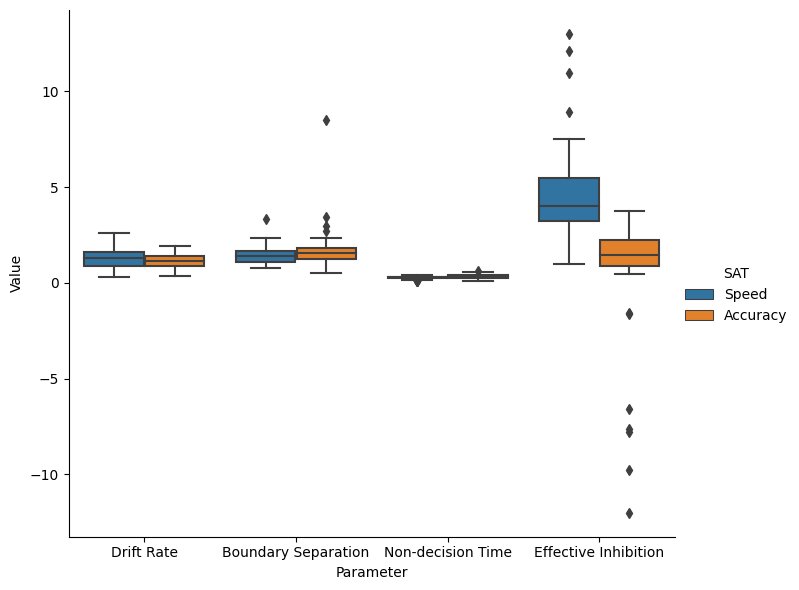

In [67]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6, hue_order = ["Speed", "Accuracy"])

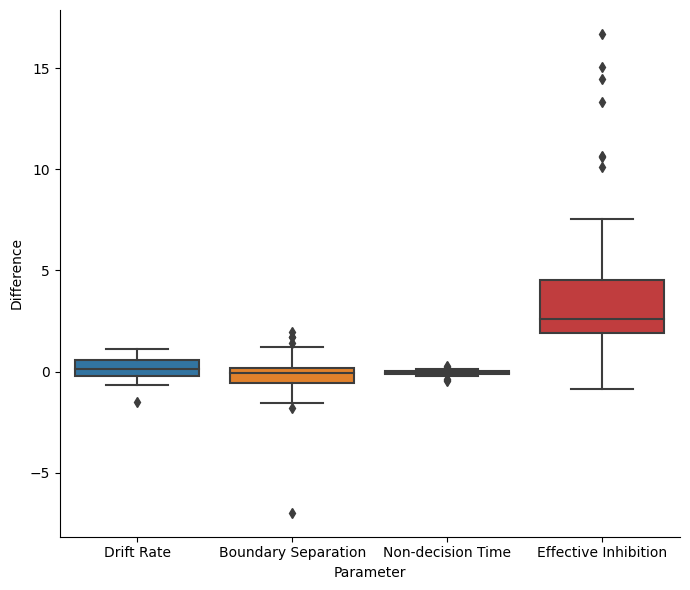

In [69]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [46]:
df_SAT.to_csv("OUMresultEvans2017.csv")

In [42]:
scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0])

Ttest_relResult(statistic=1.9648619654876747, pvalue=0.055486702279134444)

In [43]:
scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1])

Ttest_relResult(statistic=-1.174885848416182, pvalue=0.24608641413543358)

In [44]:
scipy.stats.ttest_rel(par_fitted_A[:,2], par_fitted_B[:,2])

Ttest_relResult(statistic=-2.851885647802583, pvalue=0.006488828376201763)

In [45]:
scipy.stats.ttest_rel(par_fitted_A[:,3], par_fitted_B[:,3])

Ttest_relResult(statistic=7.150433582030495, pvalue=5.422176443213374e-09)

### Fit the same data with DDM

In [55]:
par_fitted_A = np.zeros((sample_size,3))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Speed"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_A[i,:])


0


Info: Params [0.75659755 0.55244232 0.3205557 ] gave 89.06053381189598


[0.75659755 0.55244232 0.3205557 ]
1


Info: Params [2.64315903 0.6365969  0.42218656] gave -227.07078137874734


[2.64315903 0.6365969  0.42218656]
2


Info: Params [1.1989737  0.66638958 0.20797151] gave 97.46896748119008


[1.1989737  0.66638958 0.20797151]
3


Info: Params [1.48916151 0.79260839 0.40723649] gave 138.16870345811657


[1.48916151 0.79260839 0.40723649]
4


Info: Params [1.79766698 0.64204545 0.33214591] gave -55.05814323492573


[1.79766698 0.64204545 0.33214591]
5


Info: Params [1.34921868 0.57707862 0.41935386] gave 9.881145582535872


[1.34921868 0.57707862 0.41935386]
6


Info: Params [0.64551697 0.57521208 0.17723231] gave 120.98226809144322


[0.64551697 0.57521208 0.17723231]
7


Info: Params [1.86150931 0.59578929 0.40986823] gave -89.83314459347733


[1.86150931 0.59578929 0.40986823]
8


Info: Params [1.91682234 0.72766241 0.44660507] gave -5.4150318645368625


[1.91682234 0.72766241 0.44660507]
9


Info: Params [0.73586619 0.69530923 0.35816953] gave 267.2798542195151


[0.73586619 0.69530923 0.35816953]
10


Info: Params [0.95963986 0.62513933 0.41341304] gave 151.666840437588


[0.95963986 0.62513933 0.41341304]
11


Info: Params [0.88399858 0.67544622 0.20784291] gave 179.69127517439225


[0.88399858 0.67544622 0.20784291]
12


Info: Params [1.46090197 0.7886522  0.38613472] gave 123.58192588834481


[1.46090197 0.7886522  0.38613472]
13


Info: Params [0.50113123 0.77635156 0.38179723] gave 391.82195275929223


[0.50113123 0.77635156 0.38179723]
14


Info: Params [0.84480344 0.62741331 0.28268542] gave 253.25721301855378


[0.84480344 0.62741331 0.28268542]
15


Info: Params [1.4164858  0.68239675 0.38816561] gave 82.52900944227795


[1.4164858  0.68239675 0.38816561]
16


Info: Params [1.52353539 0.78659819 0.35818788] gave 113.53194148443112


[1.52353539 0.78659819 0.35818788]
17


Info: Params [1.17427983 0.587617   0.37051344] gave 51.31797910270896


[1.17427983 0.587617   0.37051344]
18


Info: Params [1.04806315 0.69680738 0.33331538] gave 173.31613188232225


[1.04806315 0.69680738 0.33331538]
19


Info: Params [0.49651546 1.07374939 0.16057003] gave 586.0036419851992


[0.49651546 1.07374939 0.16057003]
20


Info: Params [2.28832761 0.5790967  0.31888875] gave -196.3964355618972


[2.28832761 0.5790967  0.31888875]
21


Info: Params [1.89064871 0.75261946 0.34299428] gave -8.326817234719073


[1.89064871 0.75261946 0.34299428]
22


Info: Params [1.01116759 0.71450636 0.35697687] gave 211.52748852629665


[1.01116759 0.71450636 0.35697687]
23


Info: Params [1.06546317 0.78360837 0.46613962] gave 237.48131549623534


[1.06546317 0.78360837 0.46613962]
24


Info: Params [0.88469723 0.89115408 0.27530256] gave 341.20804308176


[0.88469723 0.89115408 0.27530256]
25


Info: Params [2.15429694 0.65220707 0.4692277 ] gave -127.48457137340782


[2.15429694 0.65220707 0.4692277 ]
26


Info: Params [0.92885259 0.5        0.32802253] gave -103.07060898286954


[0.92885259 0.5        0.32802253]
27


Info: Params [1.74273642 0.54126489 0.44073731] gave -111.94932772637031


[1.74273642 0.54126489 0.44073731]
28


Info: Params [1.58706085 0.53737639 0.31723482] gave -95.82473288116137


[1.58706085 0.53737639 0.31723482]
29


Info: Params [0.80621488 0.81394455 0.47979925] gave 347.226059084912


[0.80621488 0.81394455 0.47979925]
30


Info: Params [1.23629595 0.61958711 0.29575702] gave 73.88658592199228


[1.23629595 0.61958711 0.29575702]
31


Info: Params [1.36195987 0.91003755 0.35591566] gave 219.37333572229207


[1.36195987 0.91003755 0.35591566]
32


Info: Params [1.63135763 0.65048836 0.352468  ] gave 8.655437043402785


[1.63135763 0.65048836 0.352468  ]
33


Info: Params [0.48056065 0.58843241 0.16911485] gave 131.67531915408284


[0.48056065 0.58843241 0.16911485]
34


Info: Params [1.41223758 0.5        0.29767241] gave -134.68857653514473


[1.41223758 0.5        0.29767241]
35


Info: Params [1.78812921 0.5        0.3980594 ] gave -200.83829047944806


[1.78812921 0.5        0.3980594 ]
36


Info: Params [0.99526715 0.75897148 0.28793269] gave 235.33420671306183


[0.99526715 0.75897148 0.28793269]
37


Info: Params [1.69319597 0.52183788 0.28261336] gave -142.03914422558805


[1.69319597 0.52183788 0.28261336]
38


Info: Params [1.95253997 0.60408282 0.28792295] gave -125.13951063097912


[1.95253997 0.60408282 0.28792295]
39


Info: Params [0.87613915 0.64347948 0.33728301] gave 153.3695841335007


[0.87613915 0.64347948 0.33728301]
40


Info: Params [2.29471073 0.78910004 0.30612047] gave -96.56531517232432


[2.29471073 0.78910004 0.30612047]
41


Info: Params [1.58520787 0.5877358  0.32387838] gave -49.07221514518081


[1.58520787 0.5877358  0.32387838]
42


Info: Params [1.23309498 0.67177966 0.34165015] gave 99.17314758604077


[1.23309498 0.67177966 0.34165015]
43


Info: Params [0.70511549 0.70462974 0.31170372] gave 260.0634520143608


[0.70511549 0.70462974 0.31170372]
44


Info: Params [2.0790817  0.65717883 0.36823297] gave -91.02644913505674


[2.0790817  0.65717883 0.36823297]
45


Info: Params [1.23387552 0.68874932 0.35952282] gave 125.38097706512957


[1.23387552 0.68874932 0.35952282]
46


Info: Params [1.67654402 0.7247605  0.29180395] gave 32.40957272406737


[1.67654402 0.7247605  0.29180395]


In [56]:
par_fitted_B = np.zeros((sample_size,3))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Accuracy"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_B[i,:])


0


Info: Params [0.90876368 0.90141903 0.37685763] gave 382.37929804305423


[0.90876368 0.90141903 0.37685763]
1


Info: Params [1.14150501 1.10088552 0.46466562] gave 342.065297335989


[1.14150501 1.10088552 0.46466562]
2


Info: Params [1.43557131 0.73603138 0.3435127 ] gave 105.77403593985528


[1.43557131 0.73603138 0.3435127 ]
3


Info: Params [1.63638093 4.21143245 0.58339276] gave 367.8986028675487


[1.63638093 4.21143245 0.58339276]
4


Info: Params [1.00105964 0.90324182 0.34687905] gave 325.3428239554785


[1.00105964 0.90324182 0.34687905]
5


Info: Params [0.98280369 0.88988466 0.4959666 ] gave 354.5238416595285


[0.98280369 0.88988466 0.4959666 ]
6


Info: Params [0.89406025 0.70736569 0.3671484 ] gave 241.2384895975128


[0.89406025 0.70736569 0.3671484 ]
7


Info: Params [1.87915774 0.76252499 0.53078506] gave 7.716878185371755


[1.87915774 0.76252499 0.53078506]
8


Info: Params [1.26396031 0.97833434 0.47065624] gave 151.2263249624044


[1.26396031 0.97833434 0.47065624]
9


Info: Params [0.48087258 0.88470939 0.37896667] gave 484.9715268578828


[0.48087258 0.88470939 0.37896667]
10


Info: Params [0.37575454 1.12307245 0.42538179] gave 663.1494217337513


[0.37575454 1.12307245 0.42538179]
11


Info: Params [0.8302475  1.00461128 0.44058354] gave 466.853681120691


[0.8302475  1.00461128 0.44058354]
12


Info: Params [0.78170823 1.16677148 0.43426174] gave 491.2786003920408


[0.78170823 1.16677148 0.43426174]
13


Info: Params [0.61659817 0.97539545 0.45130037] gave 514.7282953516764


[0.61659817 0.97539545 0.45130037]
14


Info: Params [0.49717078 1.07856662 0.26785595] gave 581.3665514948915


[0.49717078 1.07856662 0.26785595]
15


Info: Params [0.96419666 1.11392175 0.47000992] gave 446.6137495395579


[0.96419666 1.11392175 0.47000992]
16


Info: Params [0.88556859 1.09431389 0.34284595] gave 478.36125935011614


[0.88556859 1.09431389 0.34284595]
17


Info: Params [0.62110287 0.87838377 0.40613318] gave 440.6973738689883


[0.62110287 0.87838377 0.40613318]
18


Info: Params [0.7657101  0.98128012 0.26408148] gave 436.77502846820096


[0.7657101  0.98128012 0.26408148]
19


Info: Params [0.4372395  1.31913653 0.22451531] gave 645.1874822864738


[0.4372395  1.31913653 0.22451531]
20


Info: Params [1.23266883 0.91732161 0.39902667] gave 274.9863368562608


[1.23266883 0.91732161 0.39902667]
21


Info: Params [1.19799589 1.01754163 0.44299344] gave 320.21581670844597


[1.19799589 1.01754163 0.44299344]
22


Info: Params [0.70827957 0.96952937 0.45854297] gave 484.870093823228


[0.70827957 0.96952937 0.45854297]
23


Info: Params [0.60303802 1.27202754 0.50477364] gave 544.878308573157


[0.60303802 1.27202754 0.50477364]
24


Info: Params [1.09689405 0.92907204 0.46570139] gave 322.1587021512572


[1.09689405 0.92907204 0.46570139]
25


Info: Params [1.14415744 1.04076193 0.50953075] gave 354.9362863382265


[1.14415744 1.04076193 0.50953075]
26


Info: Params [0.92385931 1.00618603 0.57038358] gave 406.8790369349889


[0.92385931 1.00618603 0.57038358]
27


Info: Params [1.22595876 0.82385175 0.53641205] gave 247.80413919061743


[1.22595876 0.82385175 0.53641205]
28


Info: Params [1.81873042 0.74362812 0.47724552] gave 2.190386034427064


[1.81873042 0.74362812 0.47724552]
29


Info: Params [0.57090312 1.11992145 0.70505176] gave 584.5462728358972


[0.57090312 1.11992145 0.70505176]
30


Info: Params [1.32753284 0.71815159 0.40946299] gave 139.5143187643942


[1.32753284 0.71815159 0.40946299]
31


Info: Params [1.31075096 1.10359296 0.37252289] gave 314.061024107365


[1.31075096 1.10359296 0.37252289]
32


Info: Params [1.42035296 0.96884112 0.45569019] gave 222.88105541118702


[1.42035296 0.96884112 0.45569019]
33


Info: Params [1.44374306 0.92556593 0.50899326] gave 210.35292742868148


[1.44374306 0.92556593 0.50899326]
34


Info: Params [1.61745515 0.71769214 0.34474868] gave 52.08824220403602


[1.61745515 0.71769214 0.34474868]
35


Info: Params [0.98375321 0.79471728 0.51604634] gave 289.7370067461664


[0.98375321 0.79471728 0.51604634]
36


Info: Params [1.24440571 1.01724148 0.3647207 ] gave 311.47546939977445


[1.24440571 1.01724148 0.3647207 ]
37


Info: Params [1.73875098 0.76646335 0.41193674] gave 39.97581726475112


[1.73875098 0.76646335 0.41193674]
38


Info: Params [1.75530913 0.8027453  0.46402809] gave 62.086425908044134


[1.75530913 0.8027453  0.46402809]
39


Info: Params [0.70956852 1.50720867 0.42921318] gave 448.4494521081406


[0.70956852 1.50720867 0.42921318]
40


Info: Params [1.08474135 1.05323222 0.50556788] gave 385.22261568053636


[1.08474135 1.05323222 0.50556788]
41


Info: Params [1.03592672 1.06188708 0.34765896] gave 412.6768323579067


[1.03592672 1.06188708 0.34765896]
42


Info: Params [0.88104073 0.88673545 0.38964207] gave 356.43953891101387


[0.88104073 0.88673545 0.38964207]
43


Info: Params [0.60175666 1.30419346 0.1220489 ] gave 616.9191057892286


[0.60175666 1.30419346 0.1220489 ]
44


Info: Params [1.18252492 0.88921439 0.37674222] gave 281.0771332876085


[1.18252492 0.88921439 0.37674222]
45


Info: Params [1.26503524 0.85737578 0.41051707] gave 235.9669853733596


[1.26503524 0.85737578 0.41051707]
46


Info: Params [0.95066297 1.36045993 0.4949947 ] gave 479.77708815207495


[0.95066297 1.36045993 0.4949947 ]


In [57]:
my_array = np.concatenate((par_fitted_A, par_fitted_B), axis = 0)
df_SAT = pd.DataFrame(my_array, columns = ['Drift Rate','Boundary Separation','Non-decision Time'])
df_SAT["SAT"] = ["Speed"]*sample_size + ["Accuracy"]*sample_size

df_SAT.to_csv("DDMresultEvans2017.csv")

In [72]:
df_SAT = pd.read_csv(('DDMresultEvans2017.csv'))

In [73]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time"])

In [74]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Difference")

In [75]:
df_dif_melted.to_csv("DDMdifResultEvans2017.csv") 


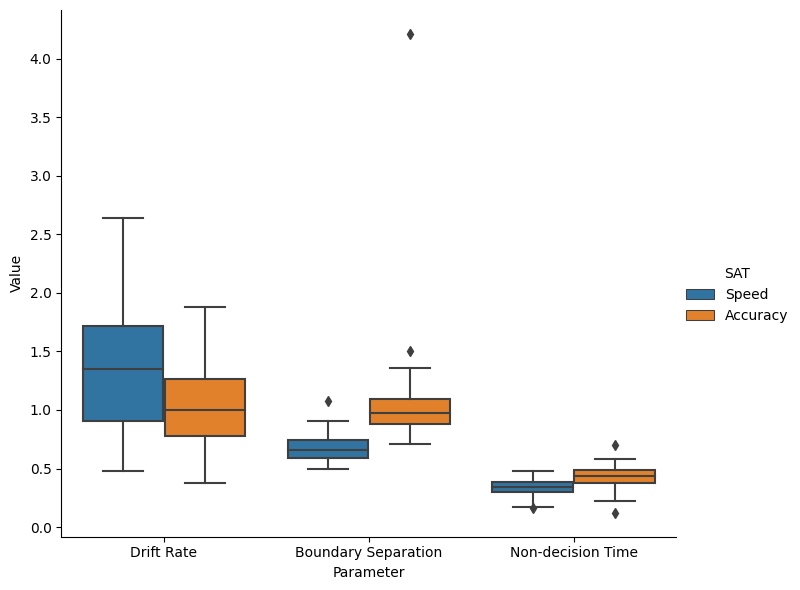

In [60]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6)

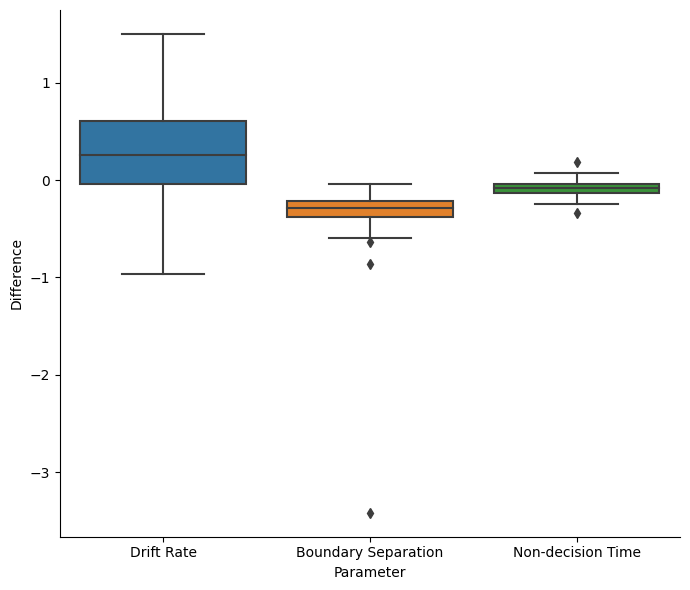

In [61]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [54]:
print(scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0]))
print(scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1]))
print(scipy.stats.ttest_rel(par_fitted_A[:,2], par_fitted_B[:,2]))
#print(scipy.stats.ttest_rel(par_fitted_A[:,3], par_fitted_B[:,3]))

Ttest_relResult(statistic=4.336639599901696, pvalue=7.818947662829324e-05)
Ttest_relResult(statistic=-5.317231618118586, pvalue=3.010032361954742e-06)
Ttest_relResult(statistic=-6.611696642074129, pvalue=3.4900999330113256e-08)
